# Analyzing Trends in Respiratory Illnesses

## INTRODUCTION :

Understanding respiratory illnesses like influenza, COVID-19, and RSV is crucial for public health. This project will analyze a dataset from the Illinois Department of Public Health (IDPH), which includes weekly data on emergency department visits and hospital admissions for respiratory conditions.

We will explore how different factors, such as age and race/ethnicity, affect the number of visits related to these illnesses. By using machine learning techniques, we aim to identify trends and make predictions about future cases.

Our analysis will include various methods to find patterns in the data, helping healthcare providers and public health officials better respond to respiratory illness outbreaks. This project seeks to provide valuable insights that can improve health outcomes and resource management during peak illness seasons.

## Goal of the Project

The primary goal of this project is to analyze trends in respiratory illnesses using machine learning techniques to enhance understanding and response strategies. Specifically, we aim to:

**1. Identify Trends:** Examine weekly data on emergency department visits and hospital admissions to uncover patterns in respiratory illnesses over time.

**2. Evaluate Demographic Factors:** Analyze how demographic factors such as age and race/ethnicity influence the rates of respiratory illnesses.

**3. Predict Future Cases:** Develop predictive models that can forecast future trends in respiratory illness visits, aiding in proactive public health planning.

**4. Support Decision-Making:** Provide actionable insights for healthcare providers and public health officials to improve resource allocation and response efforts during peak illness seasons.

## Data Story

The dataset consists of 13 features and 48,182 instances
Below is a brief description of each column, including its name, description, and data type.

Column Descriptions:
    
1. **mmwr_week**
     Description: The week number from the MMWR (Morbitity and Mortality Weekly Report) system, which is often used in epidemiological surveillance.    
     Type:Integer
        
        
2. **week**

   Description: The week number of the year for the reported data.
        
   Type: Integer
    
    

3. **week_start**

   Description: The start date of the week for which the data is reported.
        
   Type: object
 


4. **week_end**

   Description: The end date of the week for which the data is reported.
        
   Type: object
    
    

5. **season**

   Description: The flu season designation (e.g., 2023-2024) corresponding to the data.
        
   Type: Categorical
    
    
 
6. **data_source**

   Description: The source from which the data is collected (e.g.ESSENCE :Electronic Surveillance System for the Early Notification of Community-Based Epidemics.
   
   Type: Categorical
                                                             
                                                             

7. **essence_category**
                                                             
   Description: A category for the type of visits (e.g., COVID-19, Broad Acute Respiratory).
                                                             
   Type: Categorical
                                                             
                                                             

8. **respiratory_category**
                                                             
   Description: The specific type of respiratory illness (e.g., Influenza, COVID-19, RSV).
                                                             
   Type: Categorical

                                                             
9. **visit_type**
                                                             
   Description: The type of healthcare visit (e.g.,Admissions, ED Visits).
                                                             
   Type: Categorical
                                                             

                                                             
10. **demographic_category**
                                                             
   Description: General demographic classifications (e.g., age group, race/ethnicity).
                                                             
   Type: Categorical

                                                      
11. **demographic_group**
                                                             
    Description: Specific demographic group within the category (e.g., 45_64,specific racial/ethnic groups).
                                                             
    Type: Categorical
                                                             
                                                             
    
12. **percent**
                                                             
    Description: The percentage of visits attributed to the specified respiratory category for the given week.
                                                             
    Type: Float
                                                             
                                                             

13. **current_week_ending**
                                                             
    Description: The date corresponding to the end of the week for the current report.
                                                             
    Type: object

### 1.Importing the Data

In [1]:
import pandas as pd
# Load the dataset into a DataFrame
df=pd.read_csv("Visits_for_Respiratory_Illnesses.csv")

### 2. Understand the Data Structure

In [2]:

# View the first few rows of the dataset

df.head()

,mmwr_week,week,week_start,week_end,season,data_source,essence_category,respiratory_category,visit_type,demographic_category,demographic_group,percent,current_week_ending
0,202043,43,10/18/2020,10/24/2020,2020-2021,ESSENCE,CDC Influenza DD v1,Influenza,Admissions,Age Group,65+,0.05,10/26/2024
1,202032,32,08/02/2020,08/08/2020,2019-2020,ESSENCE,CDC Respiratory Syncytial Virus DD v1,RSV,Admissions,Race/Ethnicity,Asian Non-Hispanic,0.00,08/09/2025
2,202439,39,09/22/2024,09/28/2024,2023-2024,ESSENCE,CDC Broad Acute Respiratory DD v1,Broad Acute Respiratory,Admissions,Age Group,65+,16.59,09/27/2025
3,202406,6,02/04/2024,02/10/2024,2023-2024,ESSENCE,CDC Influenza DD v1,Influenza,ED Visits,Age Group,45_64,0.99,02/08/2025
4,202429,29,07/14/2024,07/20/2024,2023-2024,ESSENCE,CDC Respiratory Syncytial Virus DD v1,RSV,Admissions,Age Group,Age Unknown,0.00,07/19/2025


In [3]:
#to get a concise summary of a DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48181 entries, 0 to 48180
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mmwr_week             48181 non-null  int64  
 1   week                  48181 non-null  int64  
 2   week_start            48181 non-null  object 
 3   week_end              48181 non-null  object 
 4   season                48181 non-null  object 
 5   data_source           48181 non-null  object 
 6   essence_category      48181 non-null  object 
 7   respiratory_category  48181 non-null  object 
 8   visit_type            48181 non-null  object 
 9   demographic_category  48181 non-null  object 
 10  demographic_group     48181 non-null  object 
 11  percent               47964 non-null  float64
 12  current_week_ending   48181 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 4.8+ MB


In [4]:
# Get summary statistics
df.describe()


,mmwr_week,week,percent
count,48181.000000,48181.000000,47964.000000
mean,202075.237023,26.618273,3.307313
std,247.063217,15.004125,6.332838
min,201540.000000,1.000000,0.000000
25%,201914.000000,14.000000,0.000000
50%,202115.000000,27.000000,0.480000
75%,202303.000000,40.000000,3.340000
max,202442.000000,52.000000,100.000000


In [5]:
#colums in dataframe
df.columns

Index(['mmwr_week', 'week', 'week_start', 'week_end', 'season', 'data_source',
       'essence_category', 'respiratory_category', 'visit_type',
       'demographic_category', 'demographic_group', 'percent',
       'current_week_ending'],
      dtype='object')

### 3. Handle Missing Data

In [5]:
# Check for missing values across all columns
df.isnull().sum()

mmwr_week                 0
week                      0
week_start                0
week_end                  0
season                    0
data_source               0
essence_category          0
respiratory_category      0
visit_type                0
demographic_category      0
demographic_group         0
percent                 217
current_week_ending       0
dtype: int64

The result of df.isnull().sum() confirms that there are 217 missing values in the percent column, while all other columns have no missing values.

percentage columns shows 217 null values means 0% in a respiratory illness dataset might mean that a particular demographic group did not experience any cases of a specific illness (e.g., COVID-19, RSV) during the recorded week.
so drop percent 0 rows

In [6]:

# Drop rows with missing 'percent'
df.dropna(subset=['percent'], inplace=True)
df.isnull().sum()

mmwr_week               0
week                    0
week_start              0
week_end                0
season                  0
data_source             0
essence_category        0
respiratory_category    0
visit_type              0
demographic_category    0
demographic_group       0
percent                 0
current_week_ending     0
dtype: int64

After drop percent 0 value rows then dataset have no null values

## 4. Handle Duplicate

In [7]:
#Check for duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48176    False
48177    False
48178    False
48179    False
48180    False
Length: 47964, dtype: bool

no any duplicate values

### Compare Respiratory Illnesses by Categories:

Group the data by respiratory_category,demographic_category and season to understand which illnesses or demographic groups are most impacted.

In [8]:
# Group by respiratory category and calculate the mean percent of visits
respiratory_illness_stats = df.groupby('respiratory_category')['percent'].mean().reset_index()
print(respiratory_illness_stats)

print("\n***********************")

# Group by demographic group and calculate the mean percent of visits
demographic_stats = df.groupby('demographic_group')['percent'].mean().reset_index()
print(demographic_stats)

print("\n***********************")

# Group by season and calculate the mean percent of visits
season_stats = df.groupby('season')['percent'].mean().reset_index()
print(season_stats)


      respiratory_category    percent
0  Broad Acute Respiratory  12.488320
1                 COVID-19   1.771978
2                      ILI   1.570014
3                Influenza   0.592725
4                      RSV   0.205073

***********************
         demographic_group   percent
0                    00_04  6.016131
1                    05_17  4.325106
2                    18_44  2.098747
3                    45_64  3.003161
4                      65+  3.682120
5                      ALL  3.157790
6              Age Unknown  1.134382
7       Asian Non-Hispanic  3.444523
8       Black Non-Hispanic  3.410858
9       Hispanic or Latino  3.743733
10    Other Race/Ethnicity  3.408477
11  Unknown Race/Ethnicity  2.563324
12      White Non-Hispanic  2.897428

***********************
      season   percent
0  2015-2016  1.949561
1  2016-2017  2.594137
2  2017-2018  3.313673
3  2018-2019  2.946873
4  2019-2020  4.135665
5  2020-2021  3.263378
6  2021-2022  3.606160
7  2022-2023  3.3882

Broad Acute Respiratory illiness shows high percentage value.  0 to 4 age group shows high percentage value and highest visit percentage value for visiting respiratory department is seen 2019-2020 season. 

## 5. Data Transformation

columns like season, data_source, essence_category, respiratory_category, visit_type, demographic_category, and demographic_group are likely categorical.
Most of the columns are nominal, so one-hot encoding has been used.

### One-Hot Encoding



In [9]:
# One-Hot Encode categorical columns using pd.get_dummies

df_encoded = pd.get_dummies(df, columns=['season', 'data_source', 'essence_category', 
                                          'respiratory_category', 'visit_type', 
                                          'demographic_category', 'demographic_group'], drop_first=True)

In [10]:
df_encoded


,mmwr_week,week,week_start,week_end,percent,current_week_ending,season_2016-2017,season_2017-2018,season_2018-2019,season_2019-2020,...,demographic_group_45_64,demographic_group_65+,demographic_group_ALL,demographic_group_Age Unknown,demographic_group_Asian Non-Hispanic,demographic_group_Black Non-Hispanic,demographic_group_Hispanic or Latino,demographic_group_Other Race/Ethnicity,demographic_group_Unknown Race/Ethnicity,demographic_group_White Non-Hispanic
0,202043,43,10/18/2020,10/24/2020,0.05,10/26/2024,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,202032,32,08/02/2020,08/08/2020,0.00,08/09/2025,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,202439,39,09/22/2024,09/28/2024,16.59,09/27/2025,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,202406,6,02/04/2024,02/10/2024,0.99,02/08/2025,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,202429,29,07/14/2024,07/20/2024,0.00,07/19/2025,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48176,202442,42,10/13/2024,10/19/2024,0.66,10/19/2024,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
48177,202440,40,09/29/2024,10/05/2024,0.00,10/05/2024,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48178,202440,40,09/29/2024,10/05/2024,0.51,10/05/2024,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
48179,202441,41,10/06/2024,10/12/2024,0.00,10/12/2024,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [11]:
# Check the data types to confirm the conversion
print(df_encoded.dtypes)


mmwr_week                                                   int64
week                                                        int64
week_start                                                 object
week_end                                                   object
percent                                                   float64
current_week_ending                                        object
season_2016-2017                                             bool
season_2017-2018                                             bool
season_2018-2019                                             bool
season_2019-2020                                             bool
season_2020-2021                                             bool
season_2021-2022                                             bool
season_2022-2023                                             bool
season_2023-2024                                             bool
season_2024-2025                                             bool
data_sourc

week_start,week_end and current_week have object datatype so need to convert into datetime values
## Converting week_start, week_end and current week ending to datetime:

In [12]:
# Convert 'week_start' and 'week_end' to datetime format
df_encoded['week_start'] = pd.to_datetime(df_encoded['week_start'], format='%m/%d/%Y')
df_encoded['week_end'] = pd.to_datetime(df_encoded['week_end'], format='%m/%d/%Y')
df_encoded['current_week_ending']=pd.to_datetime(df_encoded['current_week_ending'],format='%m/%d/%Y')

# Check the data types to confirm the conversion
print(df_encoded.dtypes)


mmwr_week                                                          int64
week                                                               int64
week_start                                                datetime64[ns]
week_end                                                  datetime64[ns]
percent                                                          float64
current_week_ending                                       datetime64[ns]
season_2016-2017                                                    bool
season_2017-2018                                                    bool
season_2018-2019                                                    bool
season_2019-2020                                                    bool
season_2020-2021                                                    bool
season_2021-2022                                                    bool
season_2022-2023                                                    bool
season_2023-2024                                   

### Extracting Date Components: 
After converting the dates,extract specific components like the year, month,days or weekday.


In [13]:


# Extract the year, month, and weekday week start
df_encoded['start_year'] = df_encoded['week_start'].dt.year
df_encoded['start_month'] = df_encoded['week_start'].dt.month
df_encoded['start_day'] = df_encoded['week_start'].dt.day
df_encoded['start_weekday'] = df_encoded['week_start'].dt.weekday  # 0=Monday, 6=Sunday

#Extract the year, month, and weekday week end
df_encoded['end_year']=df_encoded['week_end'].dt.year
df_encoded['end_month']=df_encoded['week_end'].dt.month
df_encoded['end_day']=df_encoded['week_end'].dt.day
df_encoded['end_weekday']=df_encoded['week_end'].dt.weekday

#Extract the year, month, and weekday current week ending
df_encoded['current_week_ending_yr']=df_encoded['current_week_ending'].dt.year
df_encoded['current_week_ending_month']=df_encoded['current_week_ending'].dt.month
df_encoded['current_week_ending_day']=df_encoded['current_week_ending'].dt.day
df_encoded['current_week_ending_weekday']=df_encoded['current_week_ending'].dt.weekday



In [14]:
# Drop the original datetime columns


df_encoded = df_encoded.drop(columns=['week_start', 'week_end', 'current_week_ending'])
df_encoded

,mmwr_week,week,percent,season_2016-2017,season_2017-2018,season_2018-2019,season_2019-2020,season_2020-2021,season_2021-2022,season_2022-2023,...,start_day,start_weekday,end_year,end_month,end_day,end_weekday,current_week_ending_yr,current_week_ending_month,current_week_ending_day,current_week_ending_weekday
0,202043,43,0.05,False,False,False,False,True,False,False,...,18,6,2020,10,24,5,2024,10,26,5
1,202032,32,0.00,False,False,False,True,False,False,False,...,2,6,2020,8,8,5,2025,8,9,5
2,202439,39,16.59,False,False,False,False,False,False,False,...,22,6,2024,9,28,5,2025,9,27,5
3,202406,6,0.99,False,False,False,False,False,False,False,...,4,6,2024,2,10,5,2025,2,8,5
4,202429,29,0.00,False,False,False,False,False,False,False,...,14,6,2024,7,20,5,2025,7,19,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48176,202442,42,0.66,False,False,False,False,False,False,False,...,13,6,2024,10,19,5,2024,10,19,5
48177,202440,40,0.00,False,False,False,False,False,False,False,...,29,6,2024,10,5,5,2024,10,5,5
48178,202440,40,0.51,False,False,False,False,False,False,False,...,29,6,2024,10,5,5,2024,10,5,5
48179,202441,41,0.00,False,False,False,False,False,False,False,...,6,6,2024,10,12,5,2024,10,12,5


### Scale numerical features:

#### StandardScaler:
Centers the data by subtracting the mean and scaling it by dividing by the standard deviation. This will result in features with a mean of 0 and a standard deviation of 1.

The mmwr_week and week columns are numeric, so it's common to apply scaling here.


In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical features
df_encoded[['mmwr_week', 'week']] = scaler.fit_transform(df_encoded[['mmwr_week', 'week']])


## 6. Handle Outliers

IQR for the percent column in your dataset

### IQR method


In [16]:
#Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'mmwr_week' and 'week'
Q1_percent = df_encoded['percent'].quantile(0.25)
Q3_percent = df_encoded['percent'].quantile(0.75)
IQR_percent = Q3_percent - Q1_percent

# Calculate lower and upper bounds for 'mmwr_week' and 'week'
lower_bound = Q1_percent - 1.5 * IQR_percent
upper_bound = Q3_percent + 1.5 * IQR_percent


# Identify outliers
outliers = df_encoded[(df_encoded['percent'] < lower_bound) | (df_encoded['percent'] > upper_bound)]

# Print the outliers
print("Outliers detected:")
print(outliers)



Outliers detected:
       mmwr_week  week  percent  season_2016-2017  season_2017-2018  \
2         202439    39    16.59             False             False   
5         201649    49    13.92              True             False   
7         202424    24    10.45             False             False   
18        202034    34    12.71             False             False   
23        202419    19    13.40             False             False   
...          ...   ...      ...               ...               ...   
48158     202442    42    10.98             False             False   
48163     202441    41    10.23             False             False   
48166     202441    41     9.79             False             False   
48172     202441    41    13.73             False             False   
48174     202442    42    34.50             False             False   

       season_2018-2019  season_2019-2020  season_2020-2021  season_2021-2022  \
2                 False             False      

In [17]:
# Filter the DataFrame to exclude outliers based on the 'percent' column
df_no_outliers = df_encoded[(df_encoded['percent'] >= lower_bound) & (df_encoded['percent'] <= upper_bound)]

# Display the shape of the DataFrame before and after removing outliers
print(f"Original DataFrame shape: {df_encoded.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")


Original DataFrame shape: (47964, 50)
DataFrame shape after removing outliers: (40835, 50)


In [18]:
# Number of outliers detected
outliers_count = df_encoded# Number of outliers detected
outliers_count = df_encoded.shape[0] - df_no_outliers.shape[0]
print(f"Number of outliers removed: {outliers_count}")


Number of outliers removed: 7129


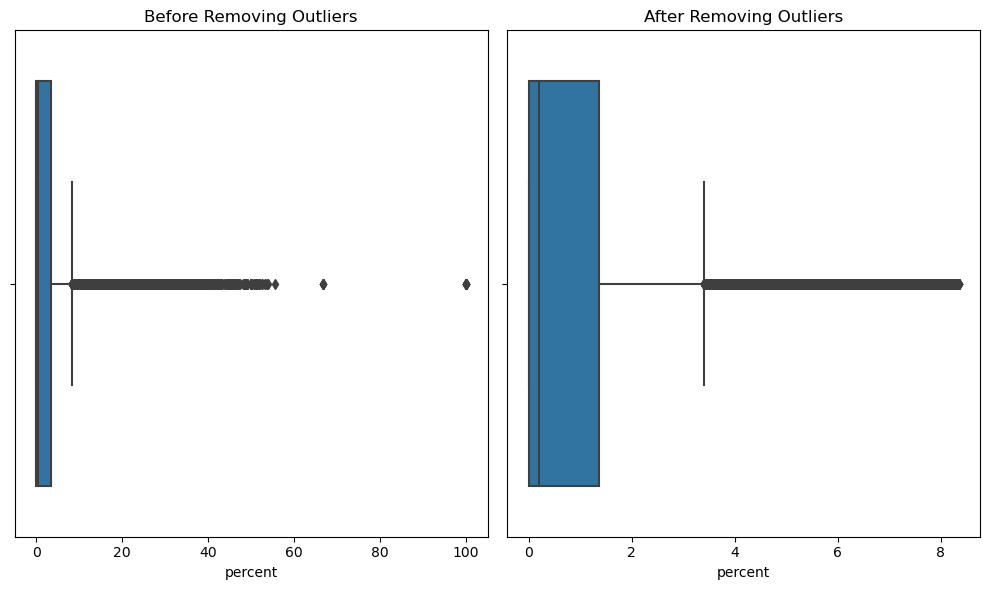

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of 'percent' before removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='percent')
plt.title("Before Removing Outliers")

# Boxplot of 'percent' after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers, x='percent')
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()


## 7. Split the Data
### Prepare features (X) and target variable (y):
predicting the percent column (the percentage of visits) and using all other columns as features.

In [21]:
from sklearn.model_selection import train_test_split

# Assuming 'percent' is the target variable
X = df_encoded.drop('percent', axis=1)  # Features
y = df_encoded['percent']                # Target variable



# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (38371, 49) (38371,)
Test set shape: (9593, 49) (9593,)


**Training Set:**


* X_train: (38371, 49) — 38,371 samples and 49 features.
* y_train: (38371,) — 38,371 target values (which are the percent values).

**Test Set:**


*X_test: (9593, 49) — 9,593 samples and 49 features.
*y_test: (9593,) — 9,593 corresponding target values.

## Data Visualization 

### 1. Univariate Analysis



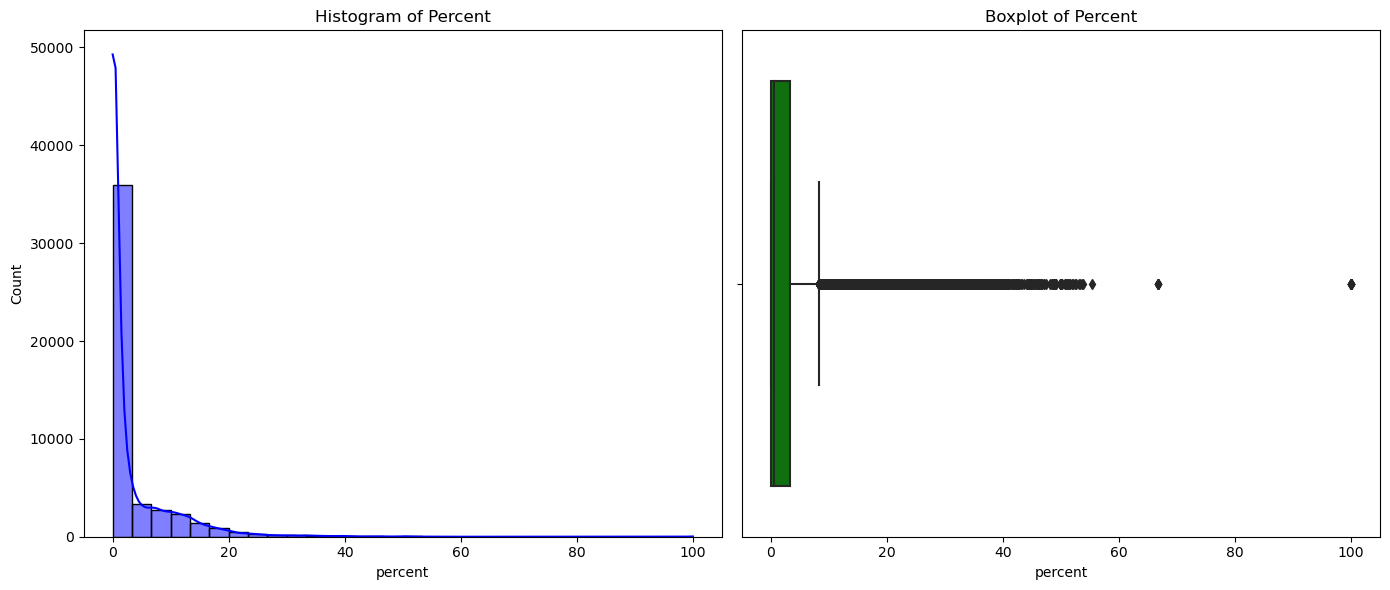

In [22]:
#Visualizing 'percent' feature with histogram and boxplot

plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['percent'], kde=True, color='blue', bins=30)
plt.title('Histogram of Percent')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['percent'], color='green')
plt.title('Boxplot of Percent')

plt.tight_layout()
plt.show()


## 2. Bivariate Analysis

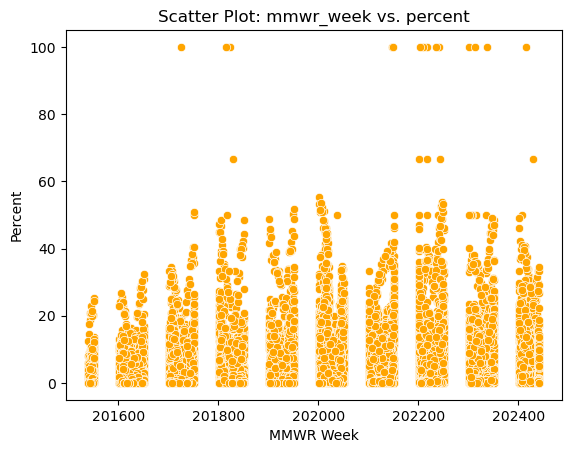

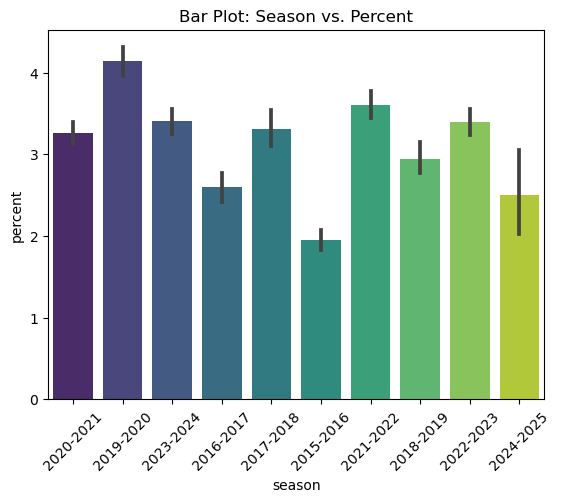

In [23]:
#scatter plot between 'mmwr_week' and 'percent'
sns.scatterplot(x=df['mmwr_week'], y=df['percent'], color='orange')
plt.title('Scatter Plot: mmwr_week vs. percent')
plt.xlabel('MMWR Week')
plt.ylabel('Percent')
plt.show()


# Bar plot between 'season' and 'percent'
sns.barplot(x='season', y='percent', data=df, palette='viridis')
plt.title('Bar Plot: Season vs. Percent')
plt.xticks(rotation=45)
plt.show()

## 3. Multivariate Analysis

C:\Users\saran\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


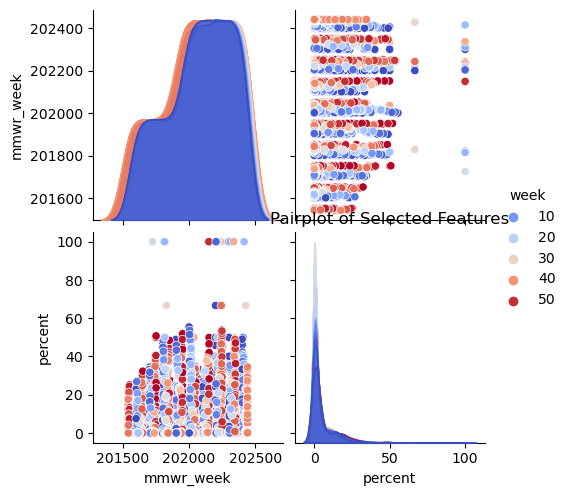

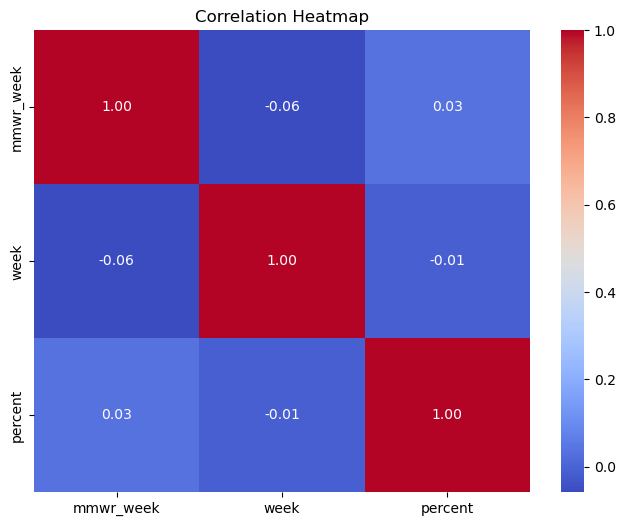

In [24]:
# Pair plot to explore relationships between multiple variables
sns.pairplot(df[['mmwr_week', 'percent', 'week']], hue='week', palette='coolwarm')
plt.title('Pairplot of Selected Features')
plt.show()


# Compute the correlation matrix
corr_matrix = df_encoded[['mmwr_week', 'week', 'percent']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

### 4. Time Series Visualization

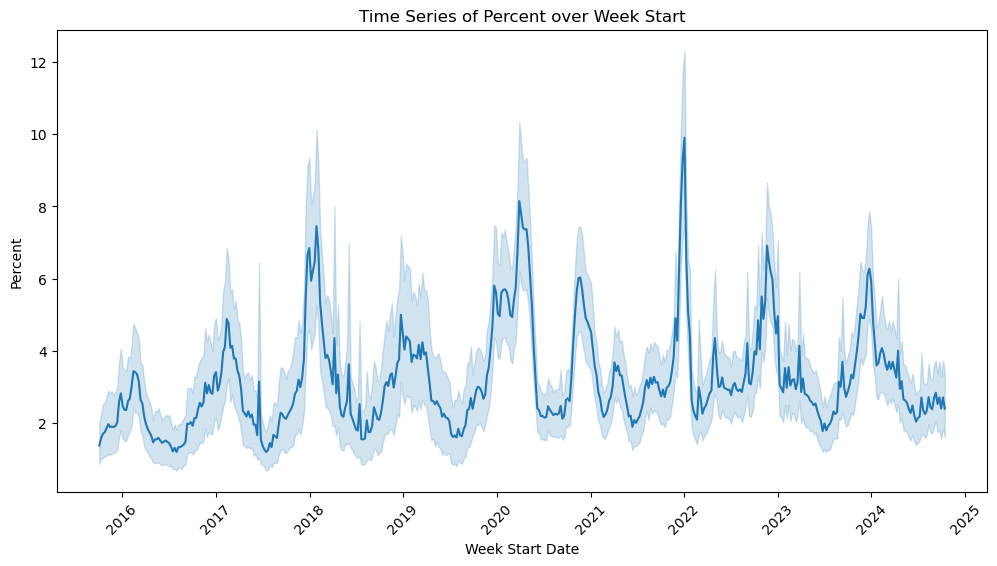

In [25]:
# Ensure 'week_start' or 'week_end' is in datetime format for time series analysis
df['week_start'] = pd.to_datetime(df['week_start'])

# Plot time series data for 'percent' over 'week_start'
plt.figure(figsize=(12, 6))
sns.lineplot(x='week_start', y='percent', data=df)
plt.title('Time Series of Percent over Week Start')
plt.xlabel('Week Start Date')
plt.ylabel('Percent')
plt.xticks(rotation=45)
plt.show()



### 5. Distribution of Data

C:\Users\saran\AppData\Local\Temp\ipykernel_1504\532927264.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_encoded['percent'], shade=True)


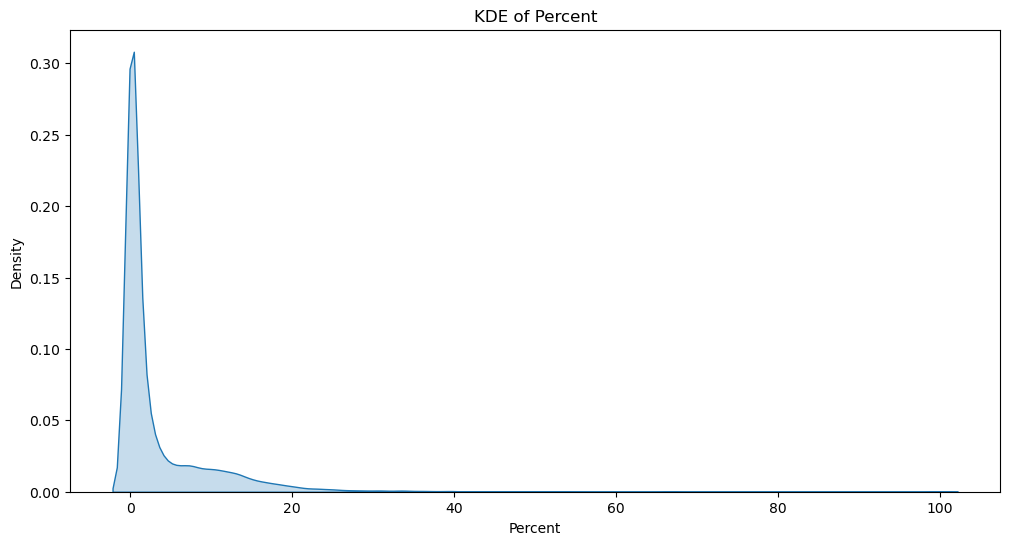

C:\Users\saran\AppData\Local\Temp\ipykernel_1504\532927264.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_encoded['week'], shade=True)


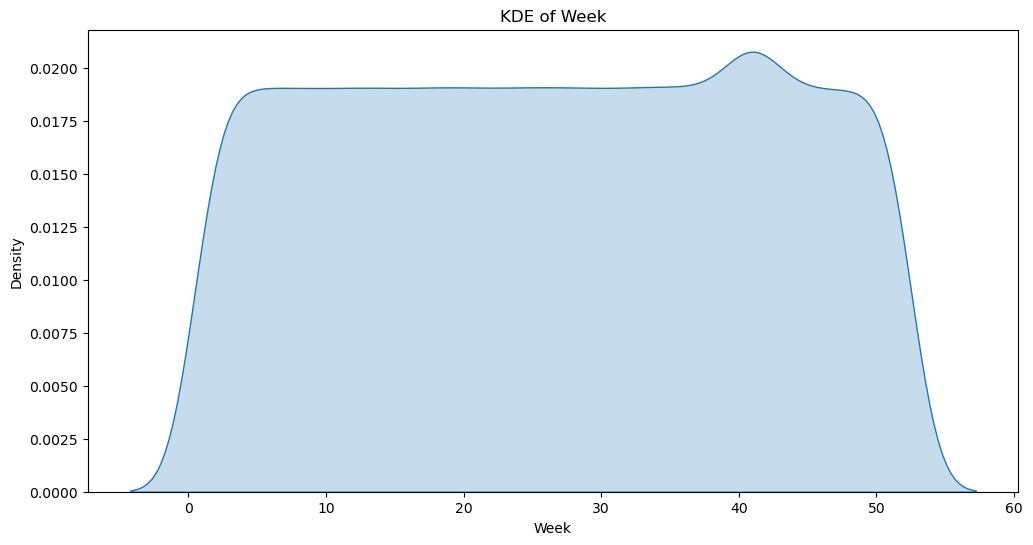

In [26]:
# KDE Plot for 'percent'
plt.figure(figsize=(12, 6))
sns.kdeplot(df_encoded['percent'], shade=True)
plt.title('KDE of Percent')
plt.xlabel('Percent')
plt.ylabel('Density')
plt.show()

# KDE Plot for 'week'
plt.figure(figsize=(12, 6))
sns.kdeplot(df_encoded['week'], shade=True)
plt.title('KDE of Week')
plt.xlabel('Week')
plt.ylabel('Density')
plt.show()

## 6. Feature Importance

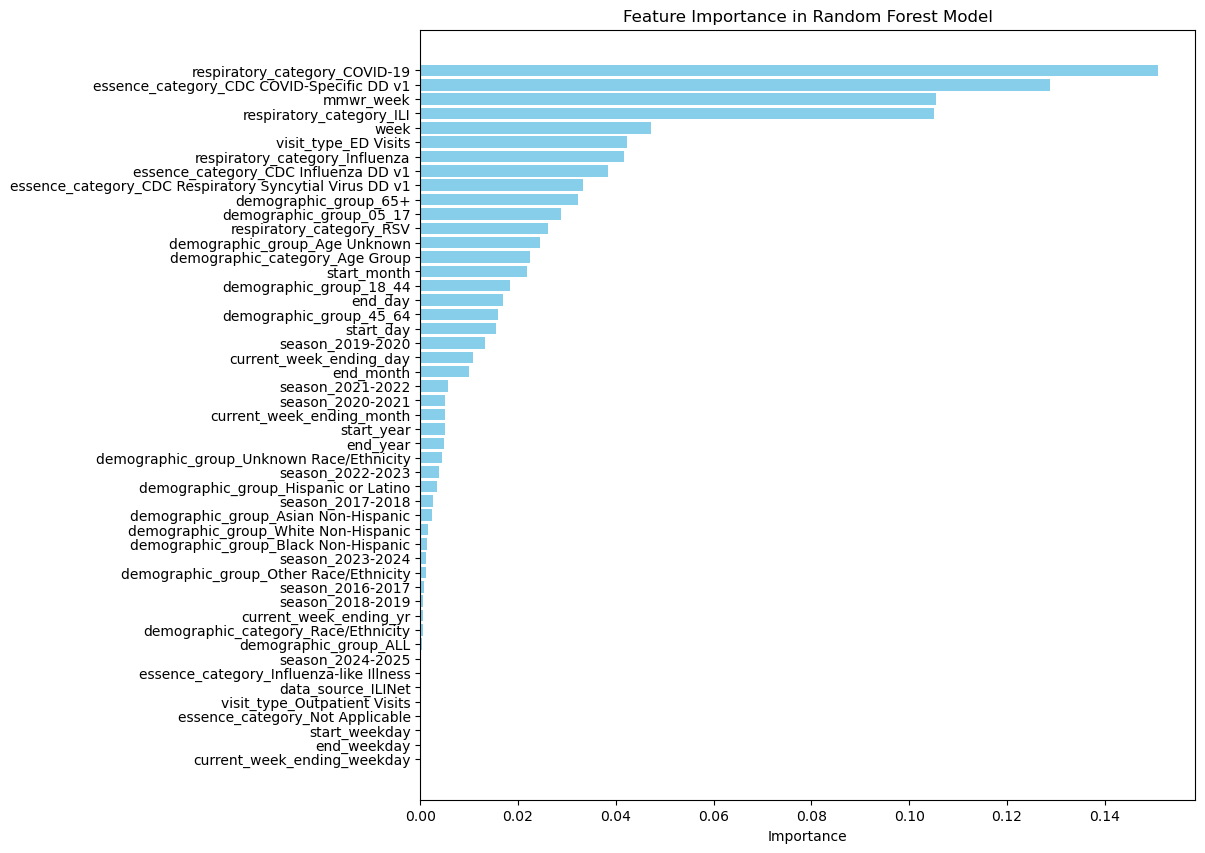

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
features = X_train.columns  # Getting the feature names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()
